In [116]:
import requests
from bs4 import BeautifulSoup
from selenium.common import exceptions
from selenium.common.exceptions import NoSuchElementException
from selenium import webdriver
import time
import pandas as pd
from selenium.common.exceptions import NoSuchElementException
from selenium import webdriver
import time
import pandas as pd

start = time.time()

def parse_jobs (search_keyword, num_of_jobs, path):
    
    options = webdriver.ChromeOptions()
    driver = webdriver.Chrome(executable_path='C:/Users/DELL/.wdm/drivers/chromedriver/win32/90.0.4430.24/chromedriver.exe', options=options)
    
    #sccrapping url
    driver.get("https://www.naukri.com/")
    
    # getting the main window handle id (some of the code below is used to close the unwanted popups)
    Main_Window = driver.current_window_handle
    
    time.sleep(5)
    
    #getting all the open window handle id's to close additional popups that are appearing
    popup_windows = driver.window_handles

    #looping through all the open  windows and closing ones that are not needed
    for winId in popup_windows:
        if winId != Main_Window: 
            driver.switch_to.window(winId)
            driver.close()
    
    # switching to the main window
    driver.switch_to.window(Main_Window)
    
    time.sleep(5)
    
    #Entering the search keword and searching
    driver.find_element_by_class_name("sugInp").send_keys(search_keyword)
    driver.find_element_by_class_name("search-btn").click()
    
    # getting the current url which has a specific format which will be used later
    get_url = driver.current_url
    
    # getting the twoparts of the url by splitting with ?
    first_part = get_url.split("?")[0]
    second_part = get_url.split("?")[-1]
    
    Title =      []
    Company =    []
    Experience = []
    Salary =     []
    Location =   []
    Tags =       []
    Reviews =    []
    Ratings =    []
    Job_Type =   []
    Posted =     []

    
    # this is where parsing begins
    for i in range(1,int(num_of_jobs/20)+1):
        
        # printing the number of pages parsed
        print ("Page {} of {}".format(i,int(num_of_jobs/20)))
        
        # forming the new url with the help of two parts we defined earlier
        url = first_part+"-"+str(i)+"?"+second_part
    
        # opening the url
        driver.get(url)
        
        # giving some time so that all elements are loaded
        time.sleep(5)

        # getting job listing details
        job_list = driver.find_elements_by_class_name("jobTuple.bgWhite.br4.mb-8")

        
        # looping through all the job listings we have found in the above line of code.
        for element in job_list:
            
            # getting the Title of the Job
            try:
                title = element.find_element_by_class_name("title.fw500.ellipsis").text
                Title.append(title)
            except NoSuchElementException:
                Title.append(None)
            
            # getting the Company name
            try:
                company = element.find_element_by_class_name("subTitle.ellipsis.fleft").text
                Company.append(company)
            except NoSuchElementException:
                Company.append(None)
            
            # getting the Experience needed for the job
            try:
                experience = element.find_element_by_class_name("ellipsis.fleft.fs12.lh16").text
                Experience.append(experience)
            except NoSuchElementException:
                Experience.append(None)
            
            # getting the Salary details if any
            try:
                salary = element.find_element_by_class_name("fleft.grey-text.br2.placeHolderLi.salary").text
                Salary.append(salary)
            except NoSuchElementException:
                Salary.append(None)
            
            # getting the Location 
            try:
                location = element.find_element_by_class_name("fleft.grey-text.br2.placeHolderLi.location").text
                Location.append(location)
            except NoSuchElementException:
                Location.append(None)
            
            # getting the Tags
            try:
                tags = element.find_element_by_class_name("tags.has-description").text
                Tags.append(tags)
            except NoSuchElementException:
                Tags.append(None)
            
            # getting the number of Reviews of the company
            try: 
                review = element.find_element_by_css_selector('a.reviewsCount.ml-5.fleft.blue-text').text
                Reviews.append(review)
            except NoSuchElementException:
                Reviews.append(None)
            
            # getting the Rating of the company
            try:
                rating = element.find_element_by_css_selector("span.starRating.fleft.dot").text
                Ratings.append(rating)
            except NoSuchElementException:
                Ratings.append(None)
            
            # getting the Job Type, eg: Hotness, Preferred etc
            try: 
                job_type = element.find_element_by_css_selector('div.jobType.type.fleft.br2.mr-8').text
                Job_Type.append(job_type)
            except NoSuchElementException:
                Job_Type.append(None)
            
            # getting the number of days before which the job was posted
            try: 
                days = element.find_element_by_css_selector('div.type.br2.fleft.grey').text
                Posted.append(days)
            except NoSuchElementException:
                try:
                    days = element.find_element_by_css_selector('div.type.br2.fleft.green').text
                    Posted.append(days)
                except NoSuchElementException:
                    Posted.append(None)
    
    # initializing empty dataframe 
    df = pd.DataFrame()
    
    # assigning values to dataframe columns
    df['Title'] =      Title
    df['Company'] =    Company
    df['Experience'] = Experience
    df['Location'] =   Location
    df['Tags'] =       Tags
    df['Ratings'] =    Ratings
    df['Reviews'] =    Reviews
    df['Salary'] =     Salary
    df['Job_Type'] =   Job_Type
    df['Posted'] =     Posted
    
    # end time to complete the process
    end = time.time()
    print ("Time Taken to Parse {} jobs is:{} seconds".format(num_of_jobs,(end-start)))
    
    # quitting the driver (browser)
    driver.quit()
    
    return df


In [ ]:
dataframe = parse_jobs("Machine Learning", 60, r"C:\Users\DELL\Desktop\Aegis Classes\Adv Python\Assignments\Hackathon")

In [16]:
dataframe

,Title,Company,Experience,Location,Tags,Ratings,Reviews,Salary,Job_Type,Posted
0,Data Engineer: Machine Learning,IBM India Pvt. Limited,4-8 Yrs,Bangalore/Bengaluru,IT Skills\nPython\nMachine Learning\nCloud\nBi...,4.0,(9969 Reviews),Not disclosed,PREFERRED,5 DAYS AGO
1,Machine Learning & Automation Expert - Data Sc...,GENPACT India Private Limited,6-11 Yrs,"Gurgaon/Gurugram, Bangalore/Bengaluru",Data Science\nMachine Learning,4.0,(10741 Reviews),Not disclosed,PREMIUM,TODAY
2,Machine Learning with Python,Siemens Limited,0-4 Yrs,Bangalore/Bengaluru,Graphics\nData analysis\nDTS\nDjango\nMySQL\nC...,4.2,(2190 Reviews),Not disclosed,None,1 DAY AGO
3,Machine Learning Engineer,IBM India Pvt. Limited,3-7 Yrs,Bangalore/Bengaluru,IT Skills\nJava\nPython\nData Science\nMachine...,4.0,(9969 Reviews),Not disclosed,PREFERRED,1 DAY AGO
4,Senior/Lead Data Scientist - Machine Learning/...,Squareroot Consulting Pvt Ltd.,1-6 Yrs,Bangalore/Bengaluru,Visualization\nExploratory Testing\nMachine Le...,None,None,Not disclosed,None,1 DAY AGO
...,...,...,...,...,...,...,...,...,...,...
4995,Sr Analyst Credit Models,Han Digital Solution (P),2-7 Yrs,Hyderabad,Computer science\nLogistic regression\nOperati...,None,None,Not disclosed,None,30+ DAYS AGO
4996,Web Developer & Marketing Executive,MARSIAN Technologies LLP,3-8 Yrs,Pune,Data mining\nDeep Learning\nMachine Learning\n...,5.0,(2 Reviews),Not disclosed,None,30+ DAYS AGO
4997,Senior Analyst - Supply Chain,Maxim India Integrated Circuit Design Pvt Ltd.,5-7 Yrs,Gandhinagar,Root cause analysis\nSupply Chain Analyst\nPro...,4.4,(64 Reviews),Not disclosed,None,30+ DAYS AGO
4998,Full Stack JavaScript Developer,Pirimid Fintech,3-8 Yrs,Ahmedabad,Front end\nDatabase design\nMachine learning\n...,None,None,Not disclosed,PREMIUM,30+ DAYS AGO


In [19]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Title       5000 non-null   object
 1   Company     5000 non-null   object
 2   Experience  5000 non-null   object
 3   Location    4999 non-null   object
 4   Tags        5000 non-null   object
 5   Ratings     2813 non-null   object
 6   Reviews     2813 non-null   object
 7   Salary      5000 non-null   object
 8   Job_Type    2604 non-null   object
 9   Posted      5000 non-null   object
dtypes: object(10)
memory usage: 390.8+ KB


In [20]:
#saving the file
#dataframe.to_csv('naukari_scrapped_data.csv',index = False)

# Connecting to sql Alchemy

In [18]:
#!pip install sqlalchemy

In [42]:
import pandas as pd
from sqlalchemy import *
import pymysql

# Credentials to database connection
hostname="localhost"
dbname="naukri_scrapped_data"
uname="root"
pwd="mypassword"

# Create SQLAlchemy engine to connect to MySQL Database
engine = create_engine("mysql+pymysql://{user}:{pw}@{host}/{db}"
                .format(host=hostname, db=dbname, user=uname, pw=pwd))

# Convert dataframe to sql table                                   
dataframe.to_sql('naukri_data_ML', engine, index=False)

C:\Users\DELL\anaconda3\lib\site-packages\pandas\io\sql.py:1444: UserWarning: The provided table name 'naukri_data_ML' is not found exactly as such in the database after writing the table, possibly due to case sensitivity issues. Consider using lower case table names.
  warnings.warn(msg, UserWarning)


# Visualization Sample

In [74]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Title       5000 non-null   object
 1   Company     5000 non-null   object
 2   Experience  5000 non-null   object
 3   Location    4999 non-null   object
 4   Tags        5000 non-null   object
 5   Ratings     2813 non-null   object
 6   Reviews     2813 non-null   object
 7   Salary      5000 non-null   object
 8   Job_Type    2604 non-null   object
 9   Posted      5000 non-null   object
dtypes: object(10)
memory usage: 390.8+ KB


In [45]:
df = dataframe.copy()

In [75]:
df.isnull().sum()

Title            0
Company          0
Experience       0
Location         1
Tags             0
Ratings          0
Reviews       2187
Salary           0
Job_Type      2396
Posted           0
dtype: int64

In [76]:
df.Experience.value_counts()

5-10 Yrs     369
2-5 Yrs      298
3-8 Yrs      258
2-7 Yrs      201
3-6 Yrs      191
            ... 
1-8 Yrs        1
4-4 Yrs        1
20-22 Yrs      1
2-9 Yrs        1
14-15 Yrs      1
Name: Experience, Length: 124, dtype: int64

In [85]:
df.Location.value_counts()      

In [50]:
import pandas as pd
import scipy.stats as sp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#importing the required libraries

In [62]:
df['Ratings']= df['Ratings'].fillna(0)

In [67]:
df['Ratings']=df['Ratings'].astype(float)

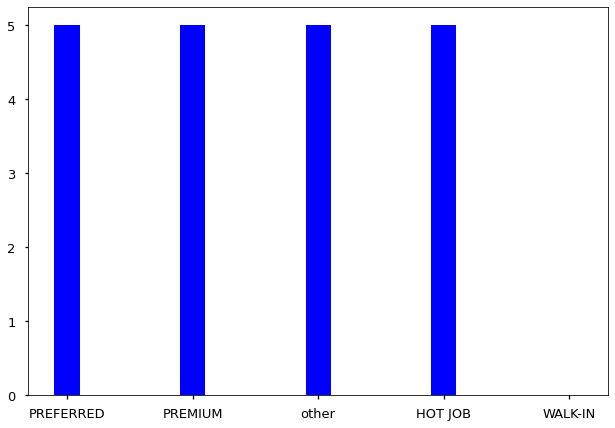

In [73]:
import matplotlib.style as s
s.use('seaborn-talk')
x=df['Job_Type'].fillna('other')
y=df['Ratings']

plt.bar(x,y, width =0.2)
plt.show()
 
#we have 7 unique Organization Group Code. whichare the org that are on top of working w.r.to year

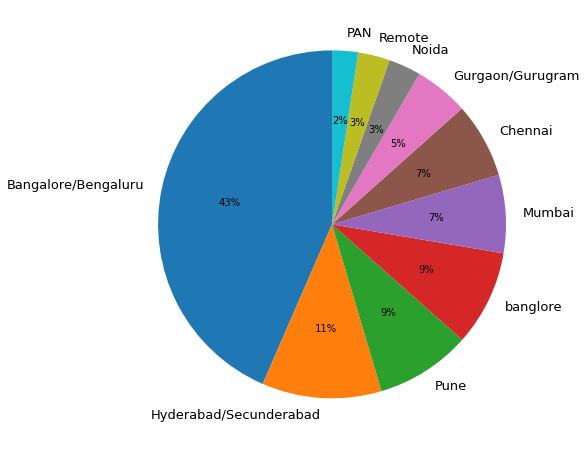

In [109]:
top10loc = df.Location.value_counts().head(10)      
leb = ['Bangalore/Bengaluru', 'Hyderabad/Secunderabad', 'Pune','banglore',
       'Mumbai', 'Chennai', 'Gurgaon/Gurugram', 'Noida', 'Remote', 'PAN']
plt.pie(top10loc,labels=leb, startangle=90,autopct="%0.0f%%")
plt.show()

#Organization unique group pie chart. organization 4 has the highest part in the company

In [108]:
df['Ratings'].value_counts().head(10)

0.0    2187
4.0     497
4.1     307
4.2     237
3.6     199
3.9     181
3.8     179
3.7     136
5.0     127
3.2     103
Name: Ratings, dtype: int64

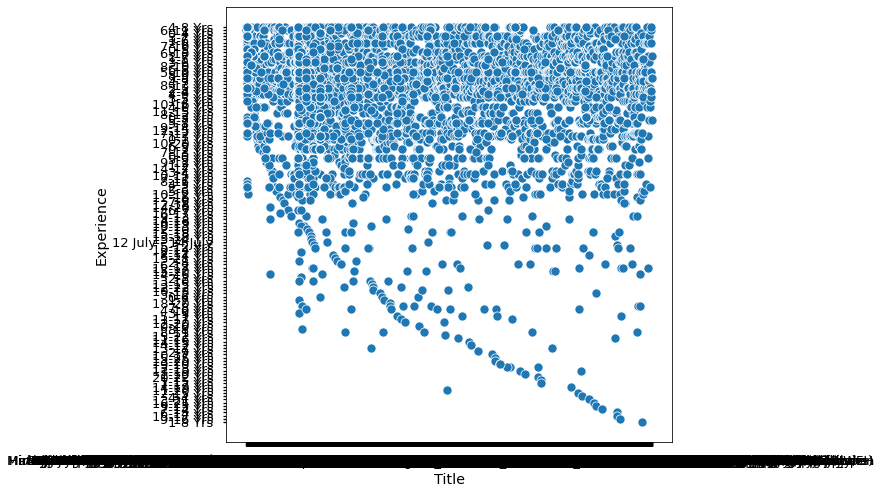

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
from gapminder import gapminder # import data set 

# Control figure size for this notebook:
plt.rcParams['figure.figsize'] = [8, 8]

# data 
data = gapminder.loc[gapminder.year == 2007]
 
# use the scatterplot function to build the bubble map
sns.scatterplot(data=df, x="Title", y="Experience",  legend=False, sizes=(20, 2000))

# show the graph
plt.show()

# WebAPP Snapshot : 
#### Developed using Streamlit


In [122]:
from IPython.display import Image

## 1 Basic Home Page 

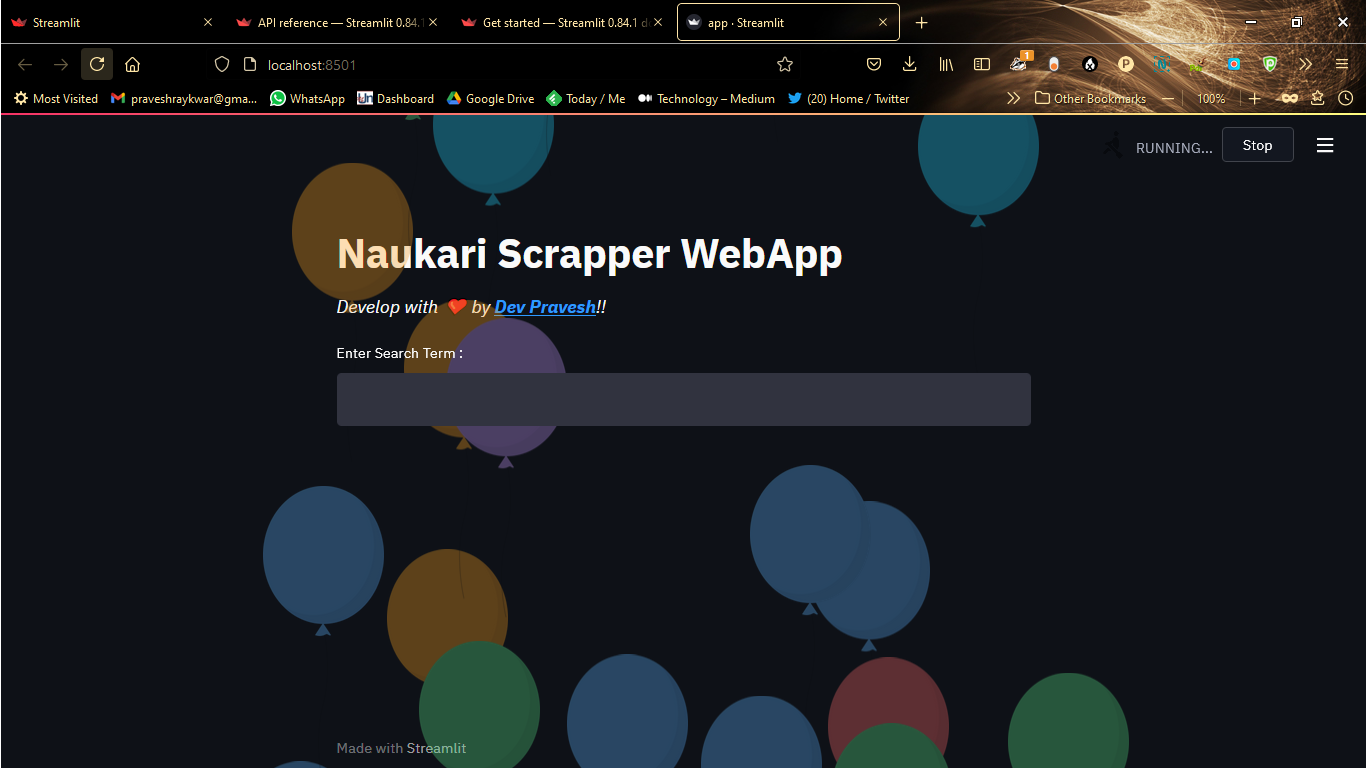

In [130]:
Image("img/Screenshot (2411).png")

## 2. Search Bar
### we can search for any job. It will be scrape in real time and provide us data.

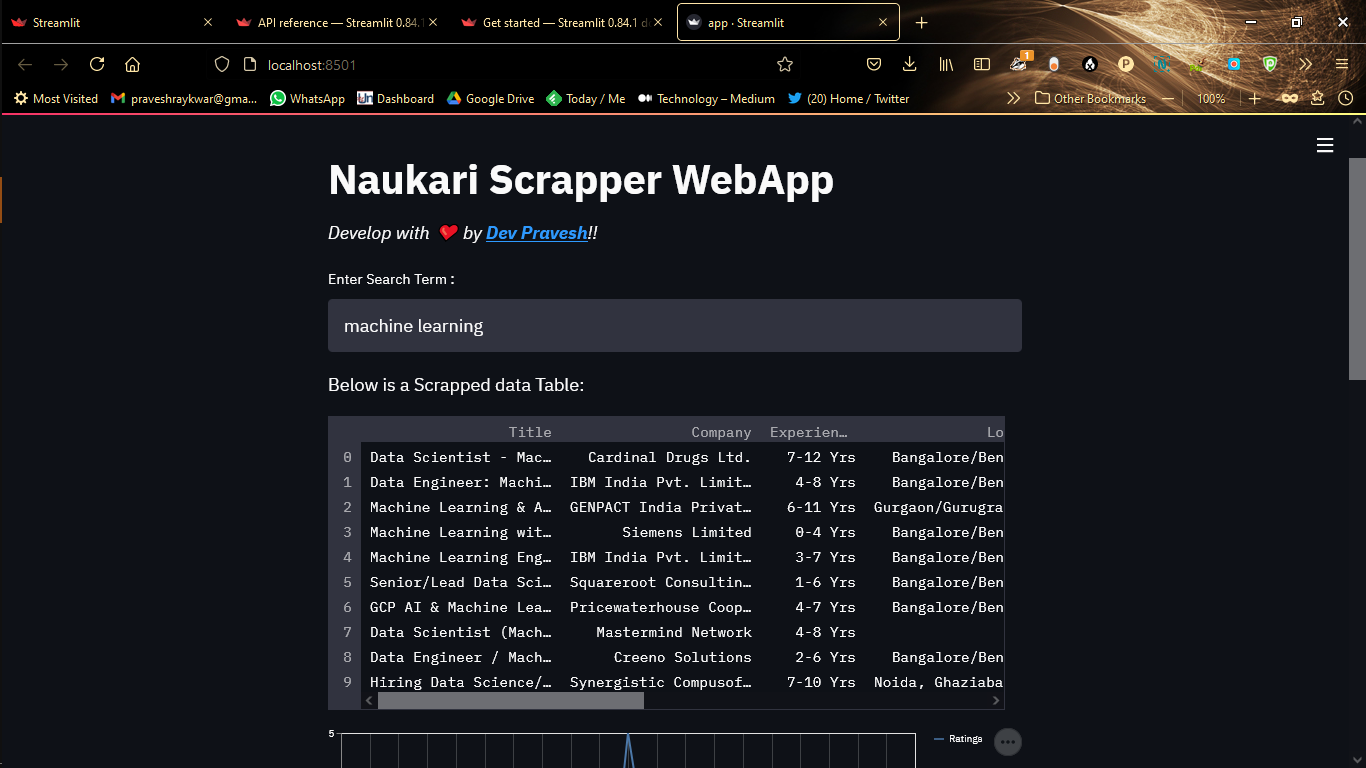

In [129]:
Image("img/Screenshot (2408).png")
# example : machine learning

## 3. charts and visual.

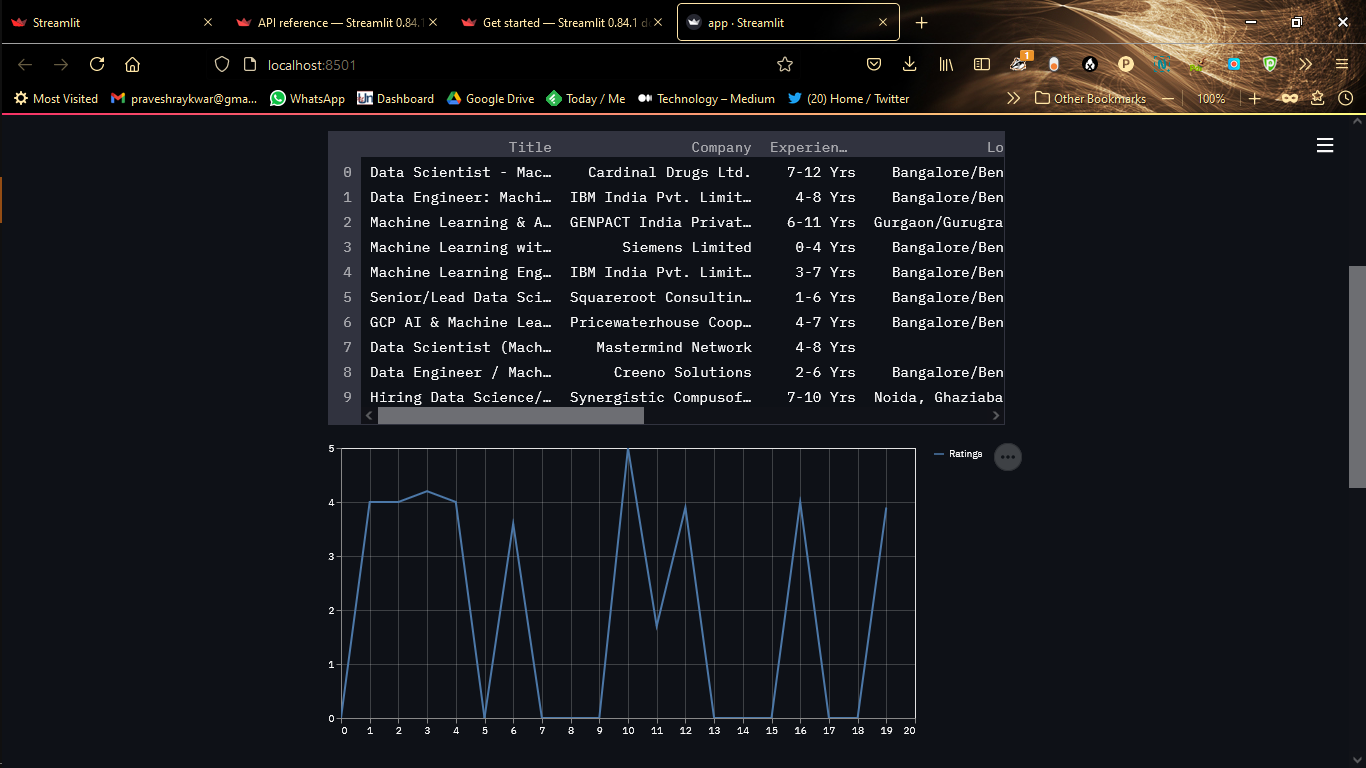

In [121]:
Image("img/Screenshot (2409).png")

In [ ]:
# submiiting the webapp code too. 
#file name : app.py